# W1 Assignment
### Dominika Chojnacka, Youssef El Otmani, Krisa Carka, Raphael Leonardi,     Marina Hornero Merino
### Codabench: gusia02, youyou354, kcarka, raphleonardi, 55horner0, 

Description of your challenge and instructions for challenge participants

⚠️ NOTE: describe everything in detail whethere it is data loading, visualization, training, or scoring. Your competition participants will use all the details to better understand your challenge.

***

`COLAB` determines whether this notebook is running on Google Colab.

In [34]:
COLAB = 'google.colab' in str(get_ipython())

In [35]:
if COLAB:
    # clone github repo
    !git clone --depth 1 https://github.com/FAIR-Universe/M1-AI-Challenge-Class-2025-26.git
    # move to the starting kit folder
    %cd M1-AI-Challenge-Class-2025-26/Starting_Kit/

# 0 - Imports & Settings

In [36]:
from sklearn.neighbors import KNeighborsClassifier
import os
import zipfile
import datetime
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from PIL import Image
import sklearn as sk
%matplotlib inline

# 1 - Data
The data class loads and reads all the raw data (.h5 files) using the read_h5 
function. 
Note: please make sure to modify the data directory to your own.

In [37]:
def read_h5(file_dir, file_name):

    return_dict = {}
    
    # Parse metadata from filename
    metadata = file_name.split("_")
    CAM = metadata[0]
    SITE = metadata[1]
    D = metadata[2]
    M = metadata[3]
    Y = metadata[4]
    TIME = metadata[5]
    F = metadata[6].replace("f=", "")
    NF = metadata[7].replace("nf=", "").replace(".h5", "")
    

    # Extract data from h5 files
    with h5py.File(os.path.join(file_dir, file_name), "r") as f:
        images = f["images"][:]
        labels = f["labels"][:]
        timestamps = f["timestamps"][:]
        visit_numbers = f["visit_numbers"][:]

        # Populate Dictionary with data
        return_dict = {
            "images": images,
            "labels": labels,
            "timestamps": timestamps,
            "visit_numbers": visit_numbers
        }

    # Populate Dictionary with metadata
    
    return_dict ["metadata"] =  {
            "CAM": CAM,
            "SITE": SITE,
            "D": D,
            "M": M,
            "Y": Y,
            "TIME": TIME,
            "F": F,
            "NF": NF,
        }       
    
    return return_dict



In [38]:
class Data:
    def __init__(self, data_dir):
        # Modify the constructor as you want
        self.data_dir = data_dir
        self.content = {}
        
    def load_data(self):
        
        files = os.listdir(self.data_dir)
        for file in files:
            with open(os.path.join(self.data_dir, file), 'r') as f:
                self.content[file] = f.read()                
                
        file = os.path(self.data_dir)
        # TODO: complete this function to load data. You can add more functions if needed
        files = os.listdir(self.data_dir)
        files = [f for f in files if f.endswith('.h5')]
        file_number = 5 # Example
        self.data = read_h5(self.data_dir, files[file_number]) 

    def view_data(self):
        files = os.listdir(self.data_dir)
        files = [f for f in files if f.endswith('.h5')]

        for file in files:
            data = read_h5(self.data_dir, file)
            values, counts = np.unique(data, return_counts=True) 

            for val, count in zip(values, counts):
                print(f"  {val}: {count}")
            print("-" * 20)


    def get_image(self, index):
        return self.data["images"][index]

    def get_label(self, index):
        return self.data["labels"][index]


In [39]:
# Modify your path here
# Example usage
DATA_DIR = "Pollinator-Data-Sample_5pct_fraisiers_hdf5_observed_series0"
data = Data(data_dir=DATA_DIR)
data.load_data()

# 2 - Visualization
This class has methods to visualize the data.

In [40]:
class Visualize:
    def __init__(self, data: Data):
        # Modify the constructor as you want
        self.data = data
    
    # visualize one image from the data
    def plot_image(self, img, lbl):
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Label: {lbl}")
        plt.show()
    def plot_data(self, index):
        # Extract single image and its label
        img = self.data.get_image(index)
        lbl = self.data.get_label(index)
        self.plot_image(img, lbl)



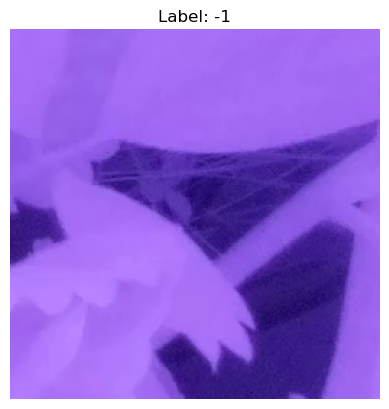

In [41]:
# Example usage
visualize = Visualize(data=data)
visualize.plot_data(80)

# 3 - Training
Here we train our model with the data. Our baseline model is KNearestNeighbors 
classifier. 

In [42]:
class Train:
    def __init__(self, data: Data):
        # Modify the constructor as you want
        self.data = data
        self.model = KNeighborsClassifier()

    def train(self):
        images = self.data.data["images"]
        labels = self.data.data["labels"]
        
        # Flatten the images from (N, H, W, C) to (N, H*W*C)
        n_samples = images.shape[0]
        images_reshaped = images.reshape((n_samples, -1))
        
        trainx, test_x, train_y, test_y = sk.model_selection.train_test_split(
            images_reshaped, labels
        )
        self.model.fit(trainx, train_y)

        self.test_x = test_x
        self.test_y = test_y


In [43]:
# Example usage
train = Train(data=data)
train.train()

# 4 - Scoring
Our scoring class uses the accuracy as the performance metric. 

In [44]:
class Score:
    def __init__(self, train_c: Train):
        self.score = None
        self.train_class = train_c

    def compute_score(self):
        predictions = self.train_class.model.predict(self.train_class.test_x)
        self.score = sk.metrics.accuracy_score(self.train_class.test_y, predictions)
        print(f"Accuracy  : {self.score}")

In [45]:
# Example usage
score = Score(train)
score.compute_score()

Accuracy  : 0.8317358892438764


# 5 - (Optional) Prepare submission for Codabench

***

In this section you should prepare a zip of the trained model (if your competition is a code submission competition) or zip of the predictions (if your competition is a result submission competition). 

***

In [46]:
class Submission:
    def __init__(self, submission_dir, zip_file_name):
        self.submission_dir = submission_dir
        self.zip_file_name = zip_file_name

        os.makedirs(self.submission_dir, exist_ok=True)

    def save_code(self):
        # TODO: Save trained model to submissions directory
        pass

    def save_result(self):
        # TODO: Save predictions to submissions directory
        pass
        
    def zip_submission(self):
        
        # Path to ZIP
        zip_path = os.path.join(self.submission_dir, self.zip_file_name)

        # Create ZIP containing the submission directory files
        with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
            for filename in os.listdir(self.submission_dir):
                file_path = os.path.join(self.submission_dir, filename)

                # Skip the zip file itself
                if file_path == zip_path:
                    continue

                zf.write(file_path, arcname=filename)
        print(f"Submission ZIP saved at: {zip_path}")

In [ ]:
# Example usage
zip_file_name = f"Submission_{datetime.datetime.now().strftime("%y-%m-%d-%H-%M")}.zip"

submission = Submission (
    submission_dir="./submission",
    zip_file_name=zip_file_name
)
submission.save_code()
# or
submission.save_result()

# Zip submission dir
submission.zip_submission()